In [43]:
# Environment Setup
# ----------------------------------------------------------------
# Dependencies
import plotly
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#sizeref = 2 * max(array of size values) / (desired maximum marker size ** 2)



In [44]:
city_csv_path = "raw_data/city_data.csv"
ride_csv_path = "raw_data/ride_data.csv"

In [45]:
city_df = pd.read_csv(city_csv_path)
ride_df = pd.read_csv(ride_csv_path)

In [46]:
#city_df

In [51]:
#ride_df
rides_count_ride_df = pd.DataFrame(ride_df["city"].value_counts()) 
rides_count_ride_df.reset_index(inplace=True)
rides_count_ride_df.columns = ["city", "number of rides"]
rides_count_ride_df = rides_count_ride_df.reset_index()
#rides_count_ride_df

In [52]:
merge_city_ride_count_df = pd.merge(rides_count_ride_df, city_df, on="city", how="outer")
#merge_city_ride_count_df

In [53]:
grouped_ride_df_1 = pd.DataFrame(ride_df.groupby("city")["fare"].mean())
grouped_ride_df_1 = grouped_ride_df_1.rename(columns={"fare":"average fare"})
grouped_ride_df_2 = pd.DataFrame(ride_df.groupby("city")["fare"].sum())
grouped_ride_df_1.reset_index(inplace=True)
grouped_ride_df_2.reset_index(inplace=True)
grouped_ride_df = pd.merge(grouped_ride_df_1, grouped_ride_df_2, on="city", how="outer")
#grouped_ride_df

In [137]:
final_merged_table = pd.merge(merge_city_ride_count_df, grouped_ride_df, on="city", how="outer")
#final_merged_table.head()
final_merged_table_urban = final_merged_table.loc[final_merged_table["type"] == "Urban",:]
final_merged_table_suburban = final_merged_table.loc[final_merged_table["type"] == "Suburban",:]
final_merged_table_rural = final_merged_table.loc[final_merged_table["type"] == "Rural",:]

In [138]:
#############  Bubble  #####################

In [197]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
urban_scatter = ax.scatter(final_merged_table_urban["number of rides"], final_merged_table_urban["average fare"], marker="o", facecolors="lightcoral", edgecolors="black", s=final_merged_table_urban["driver_count"]*10, alpha = 0.75, linewidths=1.5)
suburban_scatter = ax.scatter(final_merged_table_suburban["number of rides"], final_merged_table_suburban["average fare"], marker="o", facecolors="lightskyblue", edgecolors="black", s=final_merged_table_urban["driver_count"]*10, alpha = 0.75,linewidths=1.5)
urban_rural = ax.scatter(final_merged_table_rural["number of rides"], final_merged_table_rural["average fare"], marker="o", facecolors="gold", edgecolors="black", s=final_merged_table_urban["driver_count"]*10, alpha = 0.75,linewidths=1.5)
ax.set_facecolor("lightslategray")
plt.xlim(0,40)
plt.ylim(0,55)
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.legend((urban_scatter, suburban_scatter, urban_rural),
           ('Urban', 'Suburban', 'Rural'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=14)

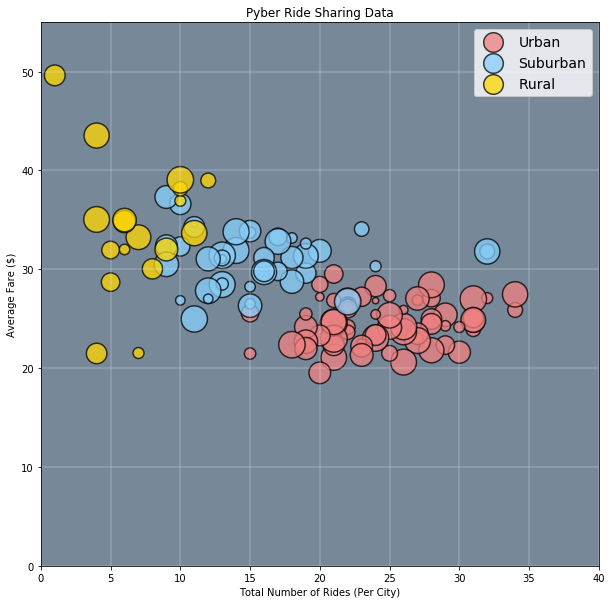

In [198]:
plt.grid(color='w', linestyle='-', linewidth=2,alpha=0.15)
plt.show()

In [131]:
#############  PIE  #####################

In [104]:
grouped_merge_for_pie = pd.DataFrame(final_merged_table.groupby("type")["fare","number of rides","driver_count", "average fare"].sum())
#grouped_merge_for_pie

In [105]:
grouped_merge_for_pie.reset_index(inplace=True)
grouped_merge_for_pie 

,type,fare,number of rides,driver_count,average fare
0,Rural,4255.09,125,104,615.728572
1,Suburban,20335.69,657,638,1300.433953
2,Urban,40078.34,1625,2607,1623.863390


In [106]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 10.0

In [107]:
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.08)
labels = grouped_merge_for_pie["type"]
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.pie(grouped_merge_for_pie["fare"], labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, labeldistance=1.05)
ax.set_title("% of Total Fares by City Type")

In [108]:
plt.axis("equal")

(-1.1167846560081485,
 1.1761024777814582,
 -1.1157351273861846,
 1.1525427749659682)

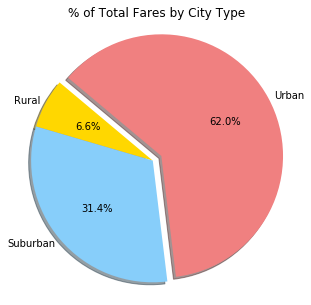

In [109]:
plt.show()

In [119]:
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.08)
labels = grouped_merge_for_pie["type"]
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.pie(grouped_merge_for_pie["number of rides"], labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, labeldistance=1.05)
ax.set_title("% of Total Rides by City Type")

In [120]:
plt.axis("equal")

(-1.1114212560216008,
 1.1959203150236031,
 -1.0904622806333382,
 1.1424608772110354)

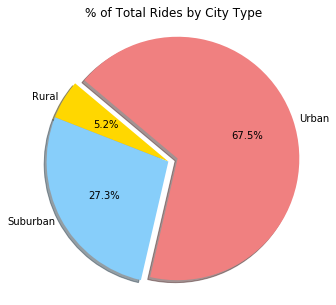

In [121]:
plt.show()

In [115]:
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.08)
labels = grouped_merge_for_pie["type"]
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
ax.pie(grouped_merge_for_pie["driver_count"], labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, labeldistance=1.05)
ax.set_title("% of Total Drivers by City Type")

In [116]:
plt.axis("equal")

(-1.1193451288312446,
 1.1849512320808815,
 -1.1038070776183508,
 1.103722383970873)

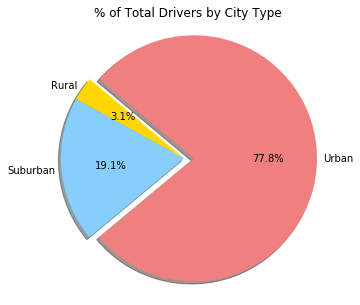

In [117]:
plt.show()